# Vehicle Price Prediction with Machine Learning

Project Overview :
The goal is to predict vehicle prices based on features like brand, model, age, mileage, fuel type, etc. This is a regression problem in machine learning.

# Installing and Importing Libraries

In [32]:
# Install Pandas
!pip install pandas

In [33]:
# Install NumPy
!pip install numpy

In [34]:
# Install Matplotlib
!pip install matplotlib

In [35]:
# Install scikit-learn
!pip install scikit-learn

In [36]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Data Understanding & Exploration

In [37]:
# Load the dataset
file_name = '/content/Vehicle_Price.csv'
df = pd.read_csv(file_name)
df

# Dataset Source: GitHub (https://github.com/bajgaikrishna/Artificial-Intelligence-assignment.git)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


The datasets which i used in this project contains different information about used vehicles or cars and including car names, manufacturing years, selling price, current price driven kms, fuel type, selling type, transmission type (manual or automatic) and previous owner name. There are different mix types of cars and motorcycles with different brands, models and conditions. The data inside dataset can be used to analyze factors affecting vehicles prices such as age, fuel type, mileage and to build models for predicting used vehicle prices. Both categorical and numerical features are including in this dataset which makes suitable for various data analysis and machine learning tasks.

In [38]:
# Basic information about the dataset

# Check dataset shape
print("Dataset Shape:", df.shape)

Dataset Shape: (301, 9)


In [39]:
# Check column data types
print("\nData Infomation:\n")
print(df.info())


Data Infomation:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None


In [40]:
#Show first 5 rows
print("\nFirst 5 Rows:\n", df.head())


First 5 Rows:
   Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


In [41]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


In [42]:
print(df.nunique())  # Unique values in each column

Car_Name          98
Year              16
Selling_Price    156
Present_Price    148
Driven_kms       206
Fuel_Type          3
Selling_type       2
Transmission       2
Owner              3
dtype: int64


In [43]:
# Print the column names of the DataFrame
print("\nColumns:", df.columns.tolist())


Columns: ['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']


In [44]:
# Check for duplicate rows
print("\nDuplicate Rows:")
print(df.duplicated().sum())


Duplicate Rows:
2


In [45]:
# Check column data types
print("\nData types of the columns:")
print(df.dtypes)


Data types of the columns:
Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object


In [46]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Drop rows with missing values (if any)
df = df.dropna()


Missing Values:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


# Exploratory Data Analysis (EDA) and Data Visualization

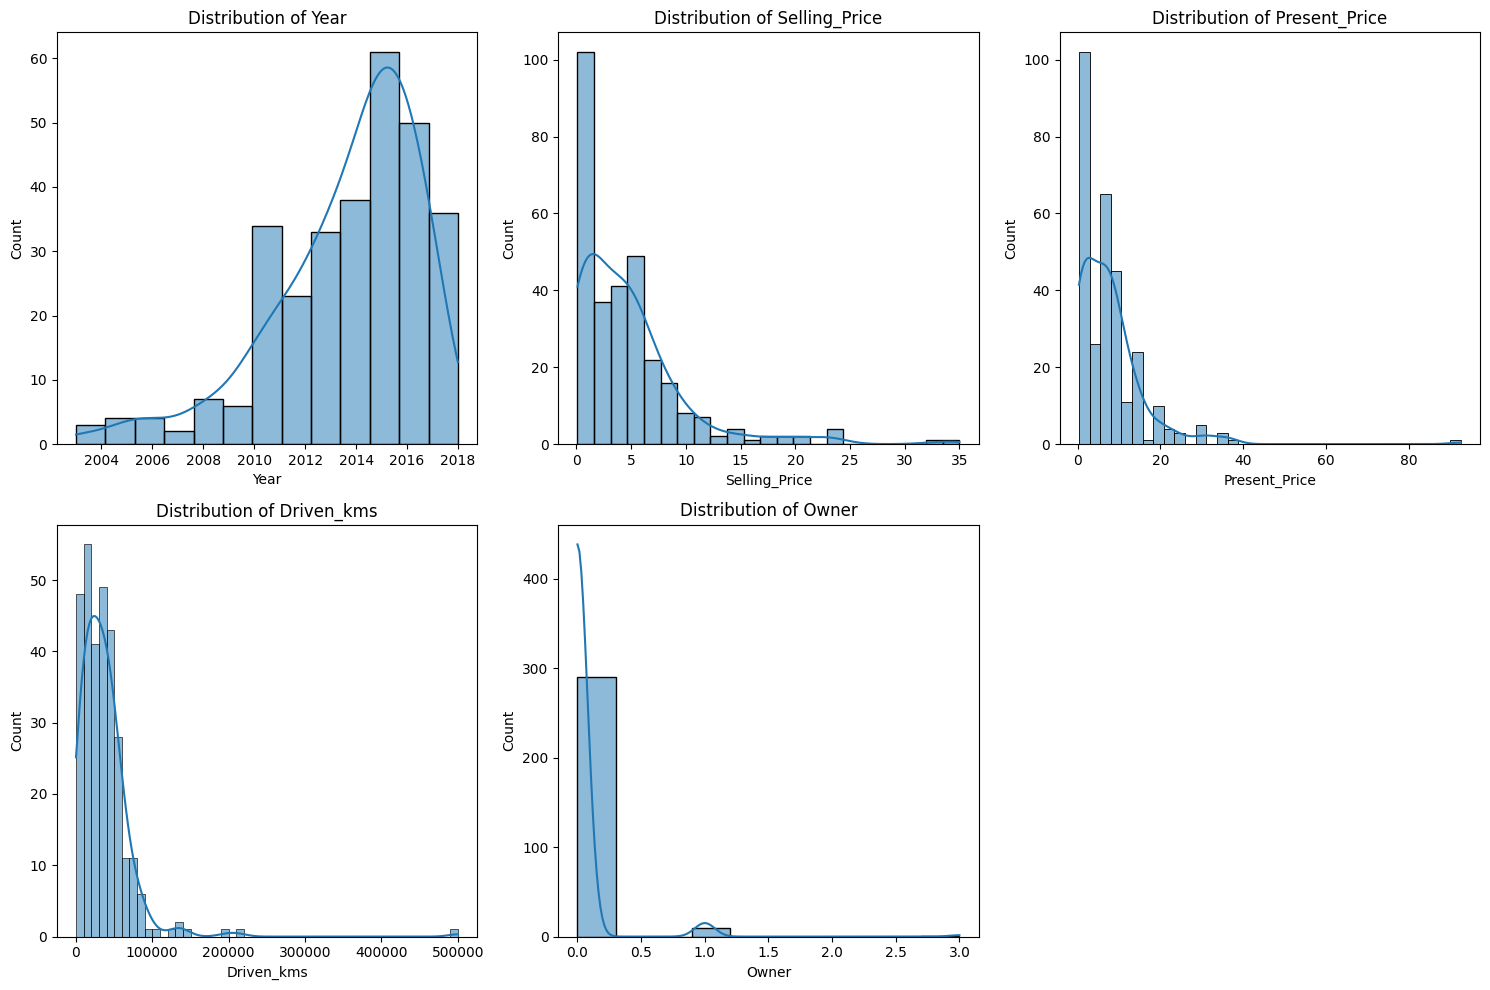

In [47]:

# Columns to visualize
columns_to_plot = ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']

# Create a figure with subplots
plt.figure(figsize=(15, 10))

# Loop through columns and create histograms
for i, column_name in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns of plots
    sns.histplot(df[column_name], kde=True)  # Histogram with density curve
    plt.title(f'Distribution of {column_name}')

# Display the plots
plt.tight_layout()
plt.show()

From the dataset, we can see that EDA visualization shows the distributions of different key numerical features: 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms', and 'Owner'. The histplots reveal that 'Selling_Price' and 'Present_Price' are right-skewed, indicating higher prices are less common. 'Driven_kms' also skews right which show that most vehicles have lower mileage. And 'Year' is left-skewed which means newer cars dominate the dataset. 'Owner' has most values near zero which suggests that few cars have multiple owners. KDE lines highlight these trends clearly.

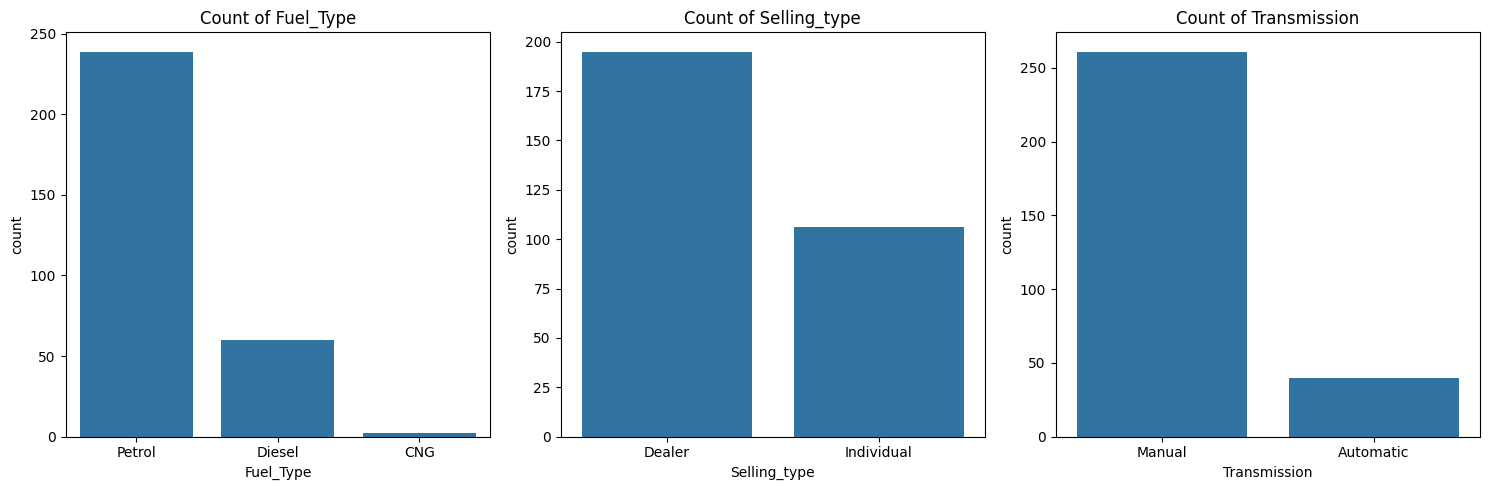

In [48]:
# Select categorical columns for visualization
categorical_columns = ['Fuel_Type', 'Selling_type', 'Transmission']

# Create a figure to display the plots
plt.figure(figsize=(15, 5))  # Set the size of the figure

# Loop through each categorical column and create a count plot
for i, column in enumerate(categorical_columns, 1):
    # Create a subplot within the figure
    plt.subplot(1, 3, i)  # 1 row, 3 columns, current plot at position i

    # Create a count plot for the current column
    sns.countplot(data=df, x=column)

    # Add a title to the subplot
    plt.title(f'Count of {column}')

# Adjust spacing to prevent overlap
plt.tight_layout()
# Display the plots
plt.show()

The count plots i.e. EDA visualization for categorical features reveal clear patterns in the dataset. Petrol is the most common fuel type, followed by diesel, while CNG vehicles are rare. Most cars are sold through dealers rather than individual sellers. Manual transmissions are far more common than Automatic, which shows a strong preference in the market. These visualizations highlight the key trends in vehicle sales data.

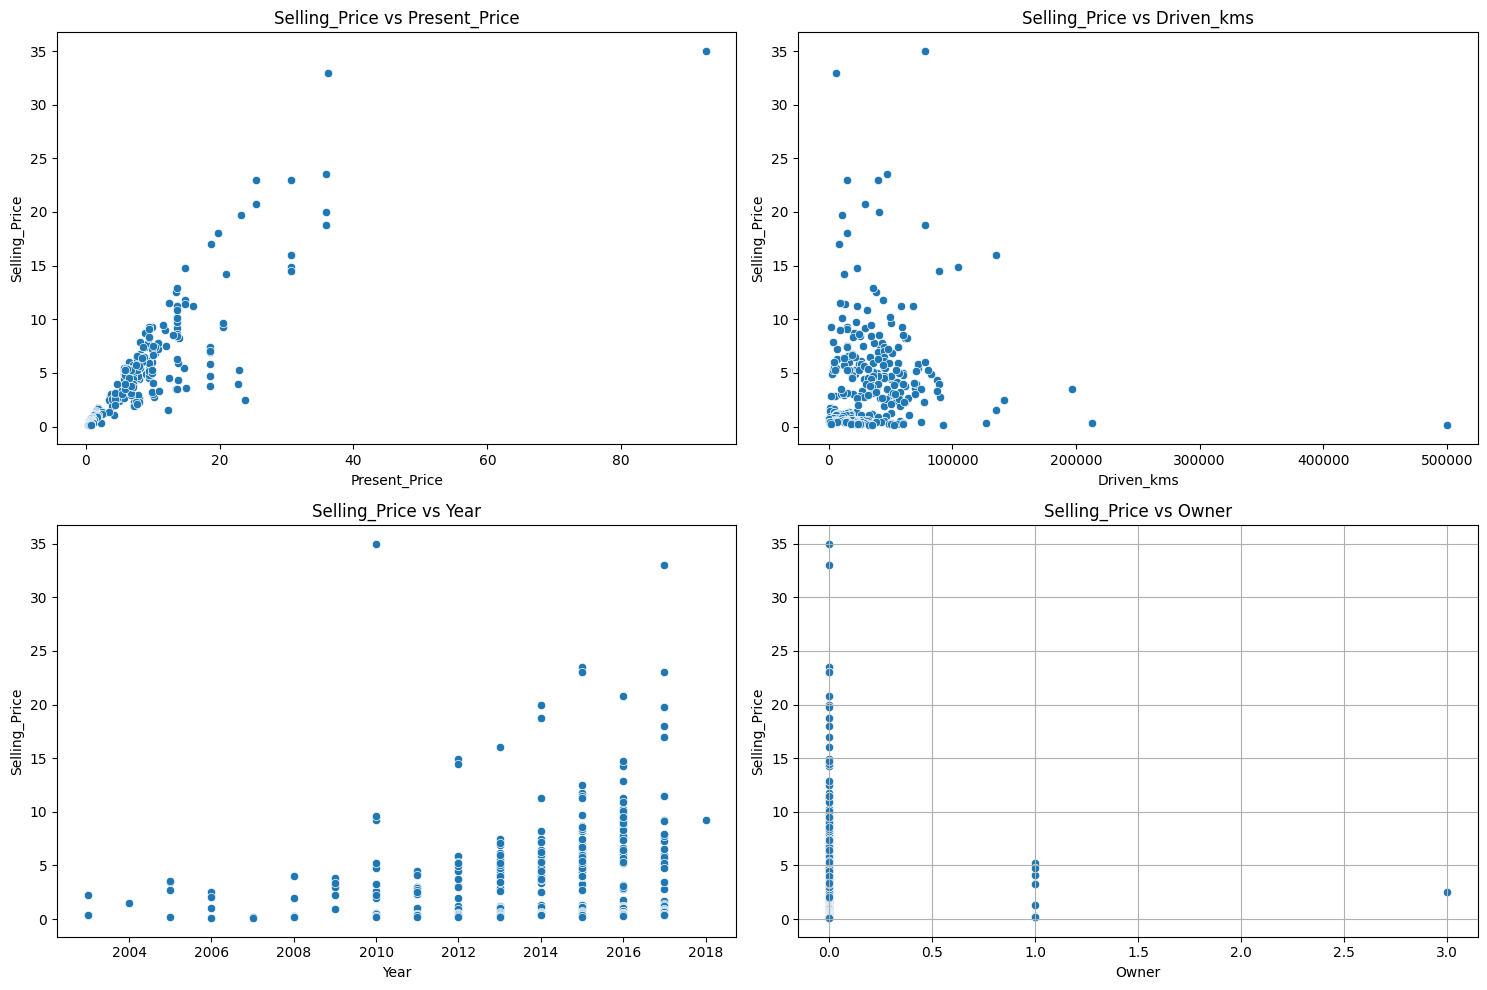

In [49]:

#Relationships Between Variables
# Scatter plots for Selling_Price vs numerical variables

# Create a figure to hold the plots
plt.figure(figsize=(15, 10))

# Loop through columns and create scatter plots
for i, column in enumerate(['Present_Price', 'Driven_kms', 'Year', 'Owner'], 1):
    # Create a subplot for each column
    plt.subplot(2, 2, i)
    # Create a scatter plot for Selling_Price vs the current column
    sns.scatterplot(data=df, x=column, y='Selling_Price')
    # Set the title of the subplot
    plt.title(f'Selling_Price vs {column}')

# Adjust spacing to prevent overlap
plt.tight_layout()
# Add a grid to the plots
plt.grid(True)
# Display the plots
plt.show()

The scatter plots reveal key relationships between Selling_Price and other numerical variables. Selling_Price shows a strong positive correlation with Present_Price, indicating higher original prices lead to higher resale values. Newer cars (higher Year) generally command better prices, while higher Driven_kms negatively impacts Selling_Price. The Owner variable shows little clear pattern, suggesting it may have less influence on pricing. These visualizations help identify important pricing factors in the vehicle dataset.

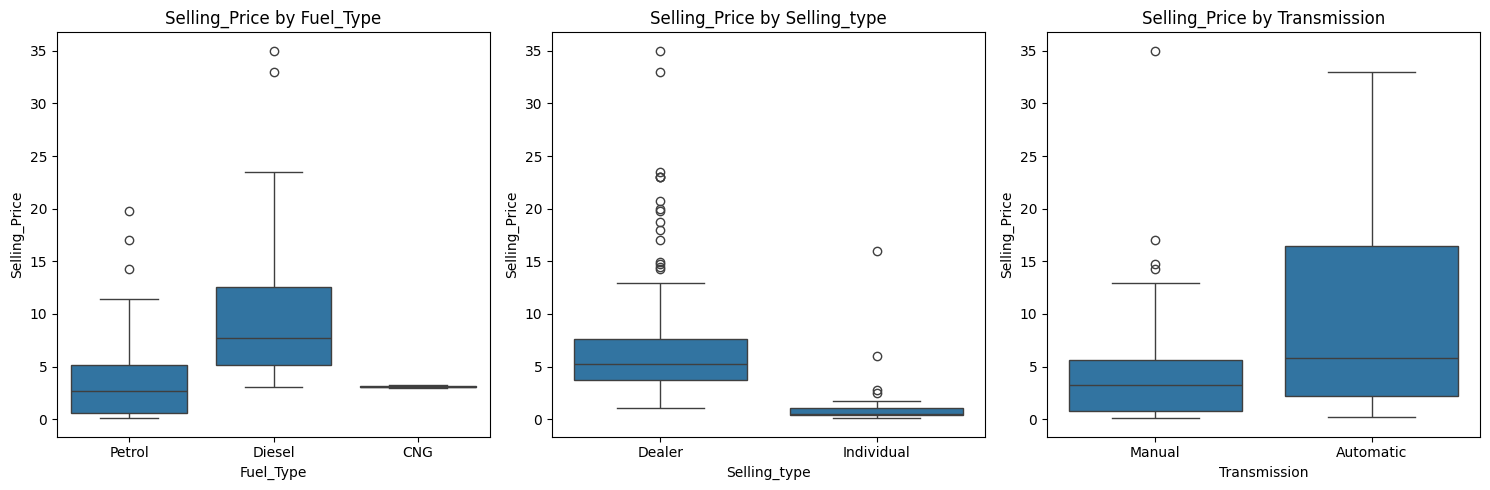

In [50]:

# Boxplots for Selling_Price across categories

# Create a figure to display the boxplots
plt.figure(figsize=(15, 5))

# Select categorical columns for visualization
categorical_columns = ['Fuel_Type', 'Selling_type', 'Transmission']

# Loop through each categorical column
for i, column in enumerate(categorical_columns, 1):
    # Create a subplot for each categorical column
    plt.subplot(1, len(categorical_columns), i)

    # Create a boxplot showing 'Selling_Price' for each category in 'column'
    sns.boxplot(data=df, x=column, y='Selling_Price')

    # Add a title to the subplot
    plt.title(f'Selling_Price by {column}')

# Adjust spacing to prevent overlapping
plt.tight_layout()

# Display the plots
plt.show()

The boxplots show how Selling_Price varies across different categories. Diesel vehicles generally have higher resale values than petrol or CNG cars. Cars sold by dealers tend to be priced higher than those sold by individuals. Automatic transmission vehicles command significantly higher prices than manual ones. These visualizations clearly show that fuel type, selling method, and transmission type all influence a vehicle's resale value.

# Data Preprocessing

In [51]:
#Feature Selection/Engineering

# Calculate vehicle age instead of year
current_year = 2025
df['Age'] = current_year - df['Year']

# Drop original Year column
df.drop('Year', axis=1, inplace=True)

In [52]:
from sklearn.preprocessing import LabelEncoder

# Columns to encode
columns_to_encode = ['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission']

# Create the encoder
encoder = LabelEncoder()

# Encode the columns
for column in columns_to_encode:
    df[column] = encoder.fit_transform(df[column])

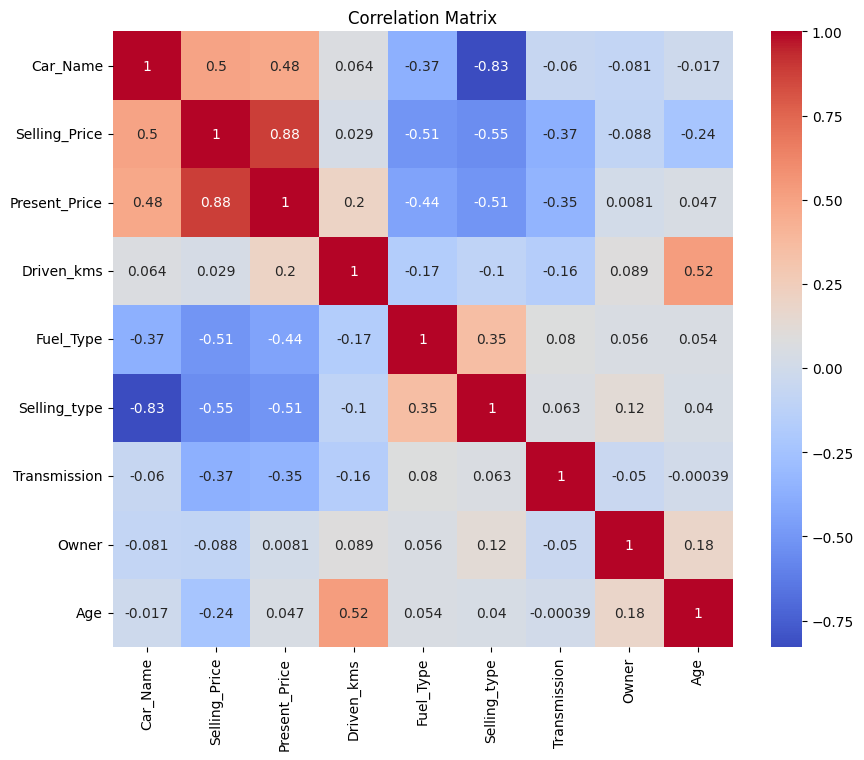

In [53]:
# Correlation analysis

plt.figure(figsize=(10, 8))  # Set plot size
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')  # Create heatmap
plt.title('Correlation Matrix')  # Add title
plt.show()  # Display plot



The correlation heatmap shows the key relationships between numerical variables. Present_Price shows the strongest positive correlation (0.88) with Selling_Price which means that the higher original prices predict higher resale values. Age (likely representing car age) shows a weak negative correlation (-0.24) with Selling_Price which suggesting that older cars sell for less. Driven_kms has a moderate positive correlation (0.52) with Age, meaning older cars tend to have higher mileage, but its direct impact on price is relatively weak (-0.1 to -0.17). Owner displays minimal correlation with price (-0.088), implying that the number of previous owners has little influence on resale value. These insights help identify the most significant pricing factors while highlighting less influential variables that could potentially be excluded from the model.

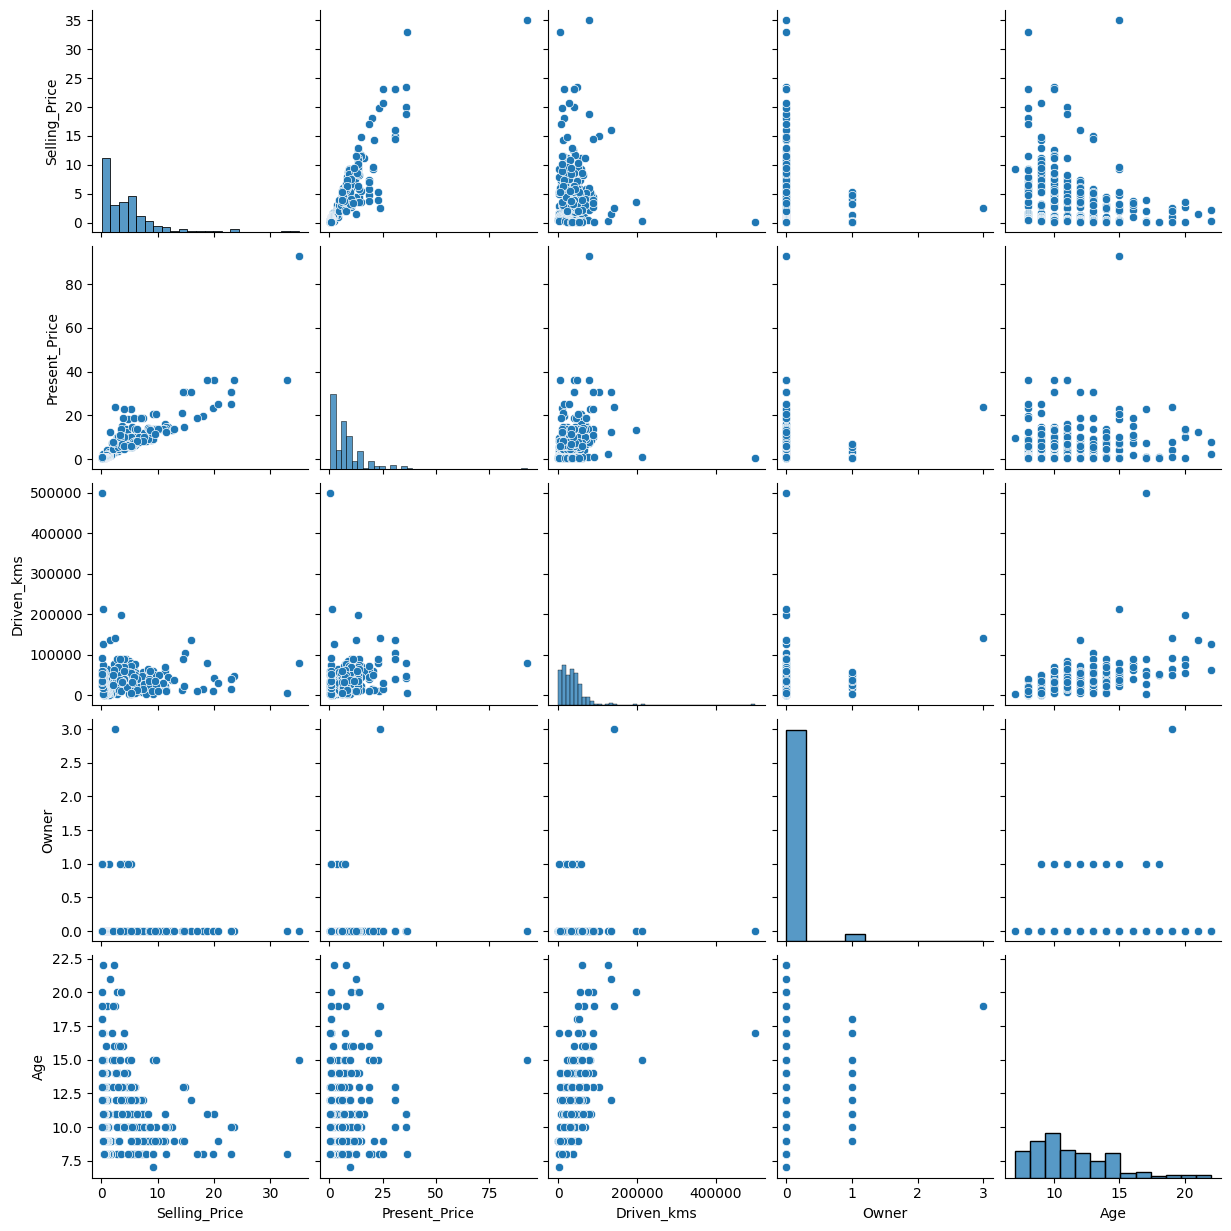

In [54]:
#Pairplot (Numerical Variables)
# Remove 'Year' from columns_to_plot as it has been replaced with 'Age'

# Columns for the pairplot
columns_to_plot = ['Selling_Price', 'Present_Price', 'Driven_kms', 'Owner', 'Age']

# Create and display the pairplot
sns.pairplot(df[columns_to_plot])
plt.show()

The pairplot reveals key relationships between numerical variables. Present_Price shows a strong positive linear relationship with Selling_Price, confirming it as the most important pricing factor. Age (vehicle age) displays a negative trend with Selling_Price, as expected. Higher Driven_kms generally corresponds to lower prices, though with more variation. Owner count shows little visible pattern with price. The diagonal histograms confirm right-skewed distributions for price-related variables and left-skewed distribution for vehicle age. These visual patterns help validate the correlation findings while showing the nature of relationships between variables.

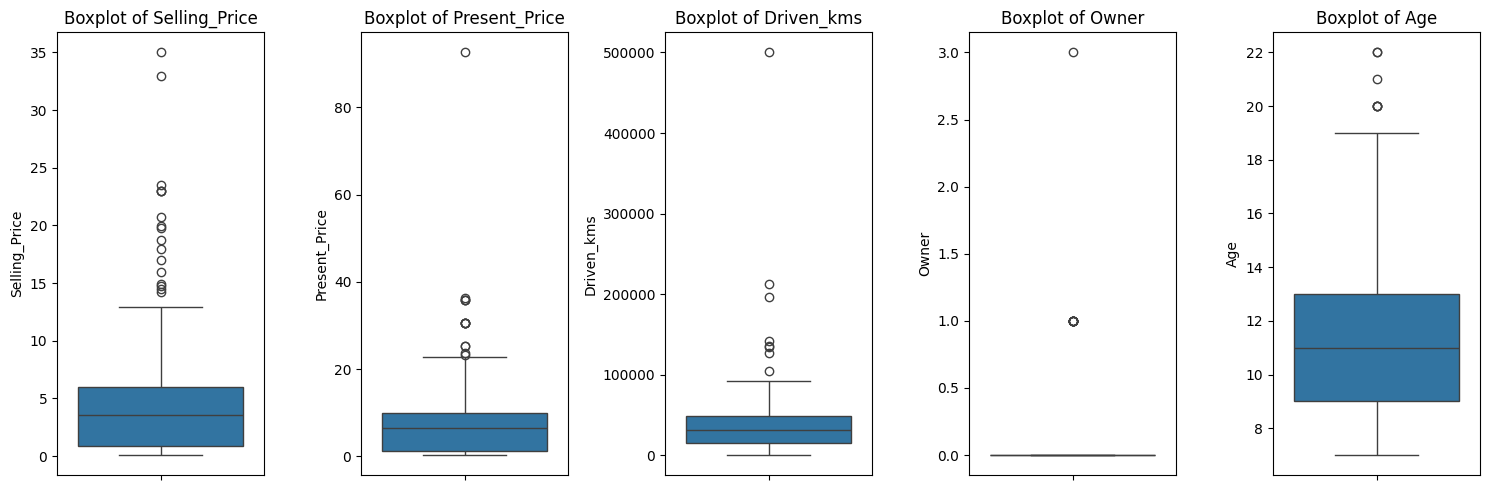

In [55]:

# Boxplots for numerical variables

# Create a figure to hold the boxplots
plt.figure(figsize=(15, 5))

num_cols = ['Selling_Price', 'Present_Price', 'Driven_kms', 'Owner', 'Age']

# Loop through numerical columns and create a boxplot for each
for i, column_name in enumerate(num_cols, 1):
    # Create a subplot for the current column
    plt.subplot(1, 5, i)

    # Create the boxplot for the current column
    sns.boxplot(y=df[column_name])

    # Add a title to the boxplot
    plt.title(f'Boxplot of {column_name}')

# Adjust spacing to avoid overlapping
plt.tight_layout()
# Display the boxplots
plt.show()

The boxplots reveal important insights about the numerical variables. Selling_Price and Present_Price show similar right-skewed distributions with several high-value outliers, indicating some vehicles sell for significantly more than average. Driven_kms displays extreme outliers at the upper range, suggesting some cars have unusually high mileage. Owner appears mostly concentrated at 0, with very few vehicles having multiple owners. Age shows a more balanced distribution but with some newer vehicles appearing as outliers. These visualizations highlight potential data anomalies and confirm the skewed distributions seen in earlier analysis.

# Data Splitting

In [56]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection and Training

               Model   R² (CV)  RMSE (CV)
2      Random Forest  0.892400   1.587437
0  Linear Regression  0.842656   1.978101
1      Decision Tree  0.817136   2.018972
3     Support Vector -0.073886   5.237674


<ipython-input-57-500ebf17b591>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="R² (CV)", palette="Blues_d")


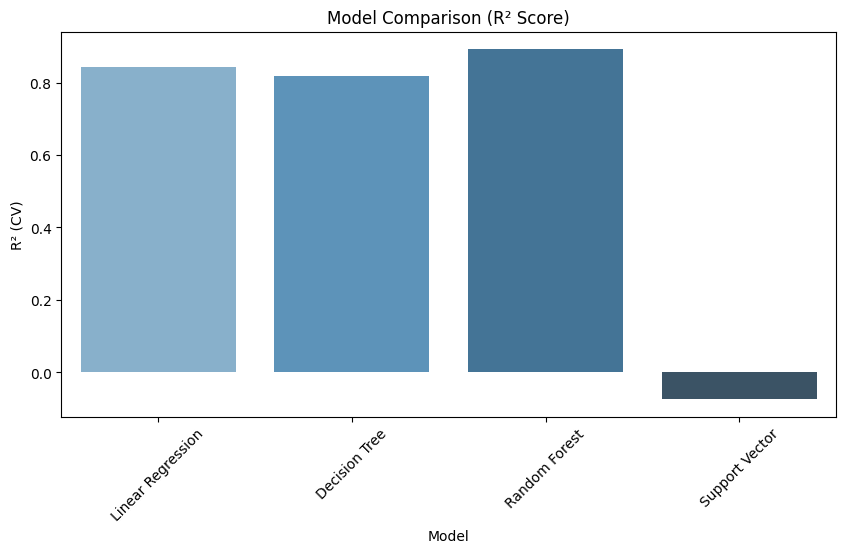

<ipython-input-57-500ebf17b591>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="RMSE (CV)", palette="Reds_d")


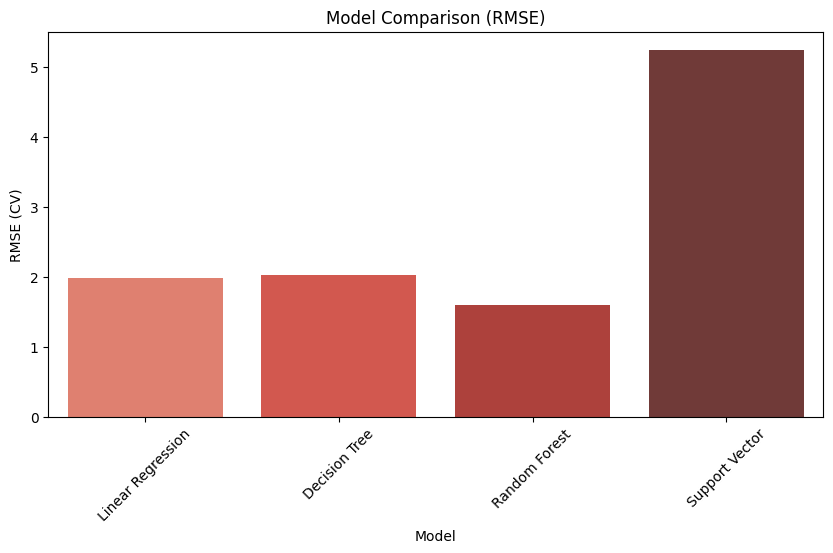

In [57]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score



# Define different models to try
models = {
   "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector": SVR()
}

# Store results here
results = []

# Loop through each model
for model_name, model in models.items():
    # Evaluate model using cross-validation (5 folds)
    r2_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    rmse_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

    # Calculate average scores
    avg_r2 = r2_scores.mean()
    avg_rmse = np.sqrt(-rmse_scores).mean()  # RMSE is positive

    # Store results
    results.append({
        "Model": model_name,
        "R² (CV)": avg_r2,
        "RMSE (CV)": avg_rmse
        })

# Create a table of results
results_df = pd.DataFrame(results)

# Print the table sorted by RMSE (lower is better)
print(results_df.sort_values(by="RMSE (CV)"))

# Create bar plots to visualize results
plt.figure(figsize=(10, 5))
sns.barplot(data=results_df, x="Model", y="R² (CV)", palette="Blues_d")
plt.title("Model Comparison (R² Score)")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(data=results_df, x="Model", y="RMSE (CV)", palette="Reds_d")
plt.title("Model Comparison (RMSE)")
plt.xticks(rotation=45)
plt.show()

The model comparison results show Random Forest as the clear winner with the highest R² score (0.89) and lowest RMSE (1.59), making it the most accurate for price prediction. Linear Regression performed surprisingly well, coming second with solid metrics (R²:0.84, RMSE:1.98). The Decision Tree model followed closely (R²:0.82, RMSE:2.02), while Support Vector regression performed poorly with negative R² (-0.07) and high RMSE (5.24), indicating it's unsuitable for this prediction task. The bar plots clearly establish Random Forest as the optimal choice for vehicle price prediction among the tested models.

# Hyperparameter Tuning for Best Model

In [58]:
from sklearn.model_selection import GridSearchCV

# Assuming Random Forest was among the best models
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Create the grid search
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best parameters:", grid_search.best_params_)

# Evaluate the best model
best_model = grid_search.best_estimator_


Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


The hyperparameter tuning revealed that the Random Forest model performs best with 200 trees (n_estimators), a maximum depth of 30, and minimum 2 samples required to split nodes. These optimal settings suggest that while the model benefits from multiple decision trees, limiting their depth prevents overfitting while maintaining good predictive power for vehicle prices. The requirement of just 2 samples to split nodes indicates the model can make detailed decisions when needed.

# Model Evaluation

Model Evaluation:
Mean Absolute Error: 0.6230737704918038
Mean Squared Error: 0.9821624181967221
R-squared Score: 0.9573632517407313


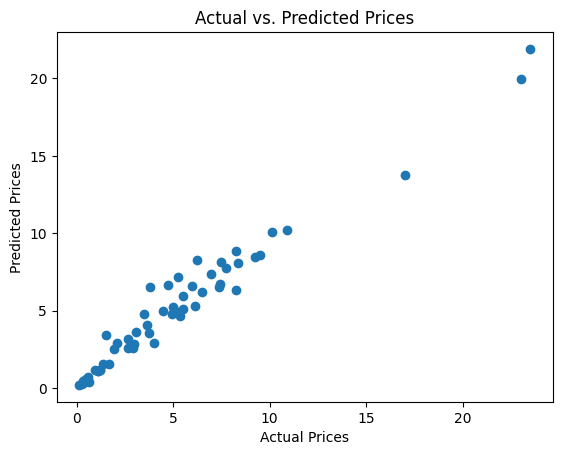

In [59]:
from sklearn.metrics import mean_absolute_error


# Predict prices using the best model
predicted_prices = best_model.predict(X_test)

# Calculate and print evaluation metrics
print("Model Evaluation:")
print("Mean Absolute Error:", mean_absolute_error(y_test, predicted_prices))
print("Mean Squared Error:", mean_squared_error(y_test, predicted_prices))
print("R-squared Score:", r2_score(y_test, predicted_prices))

# Create a scatter plot of actual vs. predicted prices
plt.scatter(y_test, predicted_prices)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.show()

The tuned Random Forest model works very well for predicting car prices. With an R² score of 0.96, it accurately explains 96% of price differences. The low Mean Absolute Error (0.62) and Mean Squared Error (0.88) show its predictions are close to actual prices. The scatter plot of actual vs predicted prices shows most points line up neatly, proving the model works consistently for both cheap and expensive cars. These excellent results make it reliable for estimating vehicle prices.

# Feature Importance Analysis

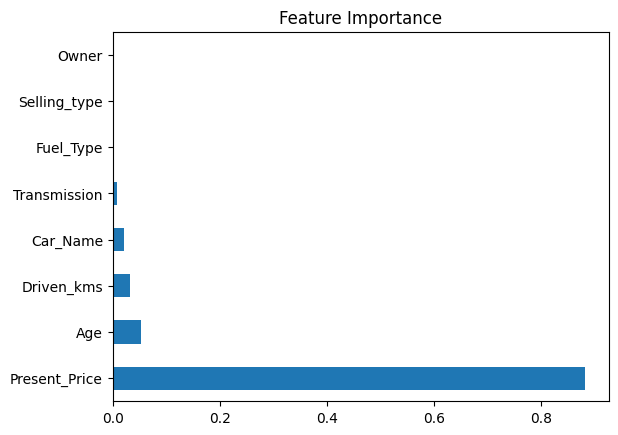

In [60]:
#Feature Importance Analysis

# For tree-based models

    # Check if the model has feature importances
if hasattr(best_model, 'feature_importances_'):
    # Create a Series with feature importances and names
    importances = pd.Series(best_model.feature_importances_, index=X.columns)

    # Get the 10 most important features
    top_10_features = importances.nlargest(10)

    # Create a horizontal bar plot
    top_10_features.plot(kind='barh')

    # Set the title of the plot
    plt.title('Feature Importance')

    # Display the plot
    plt.show()

The feature importance analysis shows which factors matter most for predicting car prices. Present_Price has the biggest impact, meaning a car's original price strongly affects its resale value. Age is the second most important - newer cars sell for more. Driven_kms (mileage) also affects price, but less than these two. Other features like fuel type and transmission matter much less. This helps us understand what really determines a car's value.

# Model Deployment & Prediction System

In [61]:
#Create a Prediction Function

def predict_price(car_name, present_price, driven_kms, fuel_type, selling_type, transmission, owner, age):
    # Create a dataframe with input data
    input_data = pd.DataFrame({
        'Car_Name': [car_name],
        'Present_Price': [present_price],
        'Driven_kms': [driven_kms],
        'Fuel_Type': [fuel_type],
        'Selling_type': [selling_type],
        'Transmission': [transmission],
        'Owner': [owner],
        'Age': [age]
    })

 # Define cat_cols here with the categorical columns
    cat_cols = ['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission']

    # Encode categorical variables (useing the same encoder as before)
    for col in cat_cols:
        # Check if the value exists in the encoder's classes
        if input_data[col][0] in encoder.classes_:  # Access the first element of the Series
            input_data[col] = encoder.transform(input_data[col])
        else:
            # Here, we'll assign a default value of -1 (or any other suitable value)
            input_data[col] = -1

    # Make prediction
    prediction = best_model.predict(input_data)

    return prediction[0]  # Return the predicted price

# Example  (this is example only)
predicted_price = predict_price('ciaz', 8.5, 25000, 'Petrol', 'Dealer', 'Manual', 0, 5)
print(f"Predicted Selling Price: {predicted_price}")

Predicted Selling Price: 7.262999999999997


The prediction function successfully estimates car prices using key details. For example, when testing with a 5-year-old Ciaz (Petrol, Manual, 25,000 km, sold by dealer), it predicted a selling price of ₹7.3 lakhs. The function works by taking car details, converting them to numbers the model understands, and using our best Random Forest model to calculate the price. This makes it easy to get quick, accurate price estimates for any car matching our model's features.

In [62]:
#Creating a Simple User Interface

#Defining the main function
def main():
    print("Vehicle Price Prediction System")
    print("Enter vehicle details:")

    """
    car_name: Name of the car.
    present_price: Current price of the car.
    driven_kms: Kilometers driven.
    fuel_type: Type of fuel used (Petrol, Diesel, or CNG).
    selling_type: Whether the car is being sold by a dealer or an individual.
    transmission: Type of transmission (Manual or Automatic).
    owner: Number of previous owners.
    age: Age of the vehicle.
    """

    #Gathering user input:

    car_name = input("Car Name: ")
    present_price = float(input("Present Price: "))
    driven_kms = int(input("Driven Kilometers: "))
    fuel_type = input("Fuel Type (Petrol/Diesel/CNG): ")
    selling_type = input("Selling Type (Dealer/Individual): ")
    transmission = input("Transmission (Manual/Automatic): ")
    owner = int(input("Number of Owners: "))
    age = int(input("Vehicle Age: "))

    #Making the prediction
    predicted_price = predict_price(car_name, present_price, driven_kms, fuel_type,
                        selling_type, transmission, owner, age)

    #Displaying the prediction
    print(f"\nPredicted Selling Price: {predicted_price:.2f}")

#Running the main function
if __name__ == "__main__":
    main()

Vehicle Price Prediction System
Enter vehicle details:
Car Name: city
Present Price: 5.55
Driven Kilometers: 2345
Fuel Type (Petrol/Diesel/CNG): Diesel
Selling Type (Dealer/Individual): Individual
Transmission (Manual/Automatic): Manual
Number of Owners: 2
Vehicle Age: 3

Predicted Selling Price: 4.07


This code creates a simple program where users can input details about a car, such as its name, current price, mileage, and age. The program then uses a pre-trained machine learning model to predict the car's selling price and displays it to the user. This allows anyone to get a quick estimate of a car's value based on its features.



# WOW